# **HOTEL BOOKING DEMAND**

Dataset from https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand/data

In [1]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None

In [2]:
# read csv and create a dataframe
# !unzip hotel_b.zip
hb_df = pd.read_csv('hotel_b/hotel_bookings.csv')

# **Exploratory Data Analysis**

In [3]:
hb_df.info()          # show for each column non-null values and its type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
hb_df.head()        # show firsts 5 rows for each column and theirs values

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
hb_df.tail()        # show lasts 5 rows for each column and theirs values

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [6]:
hb_df.describe()      # show the count of total values, mean, standard deviation, min and max value and percentage at 25%, 50%, 75%

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [7]:
hb_df.shape

(119390, 32)

# **Cleaning up the dataset**

I explore the data to understand which ones I can use and how to modify them if necessary

In [8]:
# hotel: Count the occurrences of unique values
hotel_counts = hb_df['hotel'].value_counts()
print("\nHotel counts:")
print(hotel_counts)


Hotel counts:
City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64


In [9]:
# is_canceled: Count the occurrences of unique values
is_canceled_counts = hb_df['is_canceled'].value_counts()
print("\nIs_canceled counts:")
print(is_canceled_counts)


Is_canceled counts:
0    75166
1    44224
Name: is_canceled, dtype: int64


In [10]:
# lead_time: Count the occurrences of unique values   --> the time between the booking and check-in
lead_time_counts = hb_df['lead_time'].value_counts()
print("\nLead_time counts:")
print(lead_time_counts)


Lead_time counts:
0      6345
1      3460
2      2069
3      1816
4      1715
       ... 
400       1
370       1
532       1
371       1
463       1
Name: lead_time, Length: 479, dtype: int64


In [11]:
# arrival_date_year: Count the occurrences of unique values
arrival_date_year_counts = hb_df['arrival_date_year'].value_counts()
print("\nArrival date Year counts:")
print(arrival_date_year_counts)


Arrival date Year counts:
2016    56707
2017    40687
2015    21996
Name: arrival_date_year, dtype: int64


In [12]:
# arrival_date_month: Count the occurrences of unique values
arrival_date_month_counts = hb_df['arrival_date_month'].value_counts()
print("\nArrival date Month counts:")
print(arrival_date_month_counts)


Arrival date Month counts:
August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64


In [13]:
# arrival_date_week_number: Count the occurrences of unique values
arrival_date_week_number_counts = hb_df['arrival_date_week_number'].value_counts()
print("\nArrival Date Week Number counts:")
print(arrival_date_week_number_counts)


Arrival Date Week Number counts:
33    3580
30    3087
32    3045
34    3040
18    2926
21    2854
28    2853
17    2805
20    2785
29    2763
42    2756
31    2741
41    2699
15    2689
27    2664
25    2663
38    2661
23    2621
35    2593
39    2581
22    2546
24    2498
13    2416
16    2405
19    2402
40    2397
26    2391
43    2352
44    2272
14    2264
37    2229
8     2216
36    2167
10    2149
9     2117
7     2109
12    2083
11    2070
45    1941
53    1816
49    1782
47    1685
46    1574
6     1508
50    1505
48    1504
4     1487
5     1387
3     1319
2     1218
52    1195
1     1047
51     933
Name: arrival_date_week_number, dtype: int64


In [14]:
# arrival_date_day_of_month: Count the occurrences of unique values
arrival_date_day_of_month_counts = hb_df['arrival_date_day_of_month'].value_counts()
print("\nArrival Date Day of Month counts:")
print(arrival_date_day_of_month_counts)


Arrival Date Day of Month counts:
17    4406
5     4317
15    4196
25    4160
26    4147
9     4096
12    4087
16    4078
2     4055
19    4052
20    4032
18    4002
24    3993
28    3946
8     3921
3     3855
30    3853
6     3833
14    3819
27    3802
21    3767
4     3763
13    3745
7     3665
1     3626
23    3616
11    3599
22    3596
29    3580
10    3575
31    2208
Name: arrival_date_day_of_month, dtype: int64


In [15]:
# stays_in_weekend_nights: Count the occurrences of unique values
stays_in_weekend_nights_counts = hb_df['stays_in_weekend_nights'].value_counts()
print("\nStays in weekend nights counts:")
print(stays_in_weekend_nights_counts)


Stays in weekend nights counts:
0     51998
2     33308
1     30626
4      1855
3      1259
6       153
5        79
8        60
7        19
9        11
10        7
12        5
13        3
16        3
14        2
18        1
19        1
Name: stays_in_weekend_nights, dtype: int64


In [16]:
# stays_in_week_nights: Count the occurrences of unique values
stays_in_week_nights_counts = hb_df['stays_in_week_nights'].value_counts()
print("\nStays in week nights counts:")
print(stays_in_week_nights_counts)


Stays in week nights counts:
2     33684
1     30310
3     22258
5     11077
4      9563
0      7645
6      1499
10     1036
7      1029
8       656
9       231
15       85
11       56
19       44
12       42
20       41
14       35
13       27
16       16
21       15
22        7
25        6
18        6
30        5
17        4
24        3
40        2
33        1
42        1
50        1
32        1
26        1
34        1
35        1
41        1
Name: stays_in_week_nights, dtype: int64


In [17]:
# adults: Count the occurrences of unique values
adults_counts = hb_df['adults'].value_counts()
print("\nAdults counts:")
print(adults_counts)


Adults counts:
2     89680
1     23027
3      6202
0       403
4        62
26        5
27        2
20        2
5         2
40        1
50        1
55        1
6         1
10        1
Name: adults, dtype: int64


In [18]:
# children: Count the occurrences of unique values
children_counts = hb_df['children'].value_counts()
print("\nChildren counts:")
print(children_counts)


Children counts:
0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64


In [19]:
# babies: Count the occurrences of unique values
babies_counts = hb_df['babies'].value_counts()
print("\nBabies counts:")
print(babies_counts)


Babies counts:
0     118473
1        900
2         15
10         1
9          1
Name: babies, dtype: int64


In [20]:
# meal: Count the occurrences of unique values
meal_counts = hb_df['meal'].value_counts()
print("\nMeal counts:")
print(meal_counts)


Meal counts:
BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64


In [21]:
# country: Count the occurrences of unique values
country_counts = hb_df['country'].value_counts()
print("\nCountry counts:")
print(country_counts)


Country counts:
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64


In [22]:
# market_segment: Count the occurrences of unique values
market_segment_counts = hb_df['market_segment'].value_counts()
print("\nMarket segment counts:")
print(market_segment_counts)


Market segment counts:
Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64


In [23]:
# distribution_channel: Count the occurrences of unique values
distribution_channel_counts = hb_df['distribution_channel'].value_counts()
print("\nDistribution Channel counts:")
print(distribution_channel_counts)


Distribution Channel counts:
TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64


In [24]:
# is_repeated_guest: Count the occurrences of unique values
is_repeated_guest_counts = hb_df['is_repeated_guest'].value_counts()
print("\nIs repeated guest counts:")
print(is_repeated_guest_counts)


Is repeated guest counts:
0    115580
1      3810
Name: is_repeated_guest, dtype: int64


In [25]:
# previous_cancellations: Count the occurrences of unique values
previous_cancellations_counts = hb_df['previous_cancellations'].value_counts()
print("\nPrevious cancellations counts:")
print(previous_cancellations_counts)


Previous cancellations counts:
0     112906
1       6051
2        116
3         65
24        48
11        35
4         31
26        26
25        25
6         22
19        19
5         19
14        14
13        12
21         1
Name: previous_cancellations, dtype: int64


In [26]:
# previous_bookings_not_canceled: Count the occurrences of unique values
previous_bookings_not_canceled_counts = hb_df['previous_bookings_not_canceled'].value_counts()
print("\nPrevious Bookings Not Canceled counts:")
print(previous_bookings_not_canceled_counts)


Previous Bookings Not Canceled counts:
0     115770
1       1542
2        580
3        333
4        229
       ...  
47         1
49         1
50         1
51         1
72         1
Name: previous_bookings_not_canceled, Length: 73, dtype: int64


In [27]:
# reserved_room_type: Count the occurrences of unique values
reserved_room_type_counts = hb_df['reserved_room_type'].value_counts()
print("\nReserved room type counts:")
print(reserved_room_type_counts)


Reserved room type counts:
A    85994
D    19201
E     6535
F     2897
G     2094
B     1118
C      932
H      601
P       12
L        6
Name: reserved_room_type, dtype: int64


In [28]:
# assigned_room_type: Count the occurrences of unique values
assigned_room_type_counts = hb_df['assigned_room_type'].value_counts()
print("\nAssigned room type counts:")
print(assigned_room_type_counts)


Assigned room type counts:
A    74053
D    25322
E     7806
F     3751
G     2553
C     2375
B     2163
H      712
I      363
K      279
P       12
L        1
Name: assigned_room_type, dtype: int64


In [29]:
# booking_changes: Count the occurrences of unique values
booking_changes_counts = hb_df['booking_changes'].value_counts()
print("\nBooking changes counts:")
print(booking_changes_counts)


Booking changes counts:
0     101314
1      12701
2       3805
3        927
4        376
5        118
6         63
7         31
8         17
9          8
10         6
13         5
14         5
15         3
16         2
17         2
12         2
11         2
20         1
21         1
18         1
Name: booking_changes, dtype: int64


In [30]:
# deposit_type: Count the occurrences of unique values
deposit_type_counts = hb_df['deposit_type'].value_counts()
print("\nDeposit type counts:")
print(deposit_type_counts)


Deposit type counts:
No Deposit    104641
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64


In [31]:
# agent: Count the occurrences of unique values
agent_counts = hb_df['agent'].value_counts()
print("\nAgent counts:")
print(agent_counts)


Agent counts:
9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
289.0        1
432.0        1
265.0        1
93.0         1
304.0        1
Name: agent, Length: 333, dtype: int64


In [32]:
# company: Count the occurrences of unique values
company_counts = hb_df['company'].value_counts()
print("\nCompany counts:")
print(company_counts)


Company counts:
40.0     927
223.0    784
67.0     267
45.0     250
153.0    215
        ... 
104.0      1
531.0      1
160.0      1
413.0      1
386.0      1
Name: company, Length: 352, dtype: int64


In [33]:
# customer_type: Count the occurrences of unique values
customer_type_counts = hb_df['customer_type'].value_counts()
print("\nCustomer type counts:")
print(customer_type_counts)


Customer type counts:
Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: customer_type, dtype: int64


In [34]:
# adr: Count the occurrences of unique values
adr_counts = hb_df['adr'].value_counts()
print("\nAdr counts:")
print(adr_counts)


Adr counts:
62.00     3754
75.00     2715
90.00     2473
65.00     2418
0.00      1959
          ... 
89.43        1
63.07        1
55.69        1
49.51        1
157.71       1
Name: adr, Length: 8879, dtype: int64


In [35]:
# required_car_parking_spaces: Count the occurrences of unique values
required_car_parking_spaces_counts = hb_df['required_car_parking_spaces'].value_counts()
print("\nRequired Car Parking Spaces counts:")
print(required_car_parking_spaces_counts)


Required Car Parking Spaces counts:
0    111974
1      7383
2        28
3         3
8         2
Name: required_car_parking_spaces, dtype: int64


In [36]:
# total_of_special_requests: Count the occurrences of unique values
total_of_special_requests_counts = hb_df['total_of_special_requests'].value_counts()
print("\nTotal of Special Requests counts:")
print(total_of_special_requests_counts)


Total of Special Requests counts:
0    70318
1    33226
2    12969
3     2497
4      340
5       40
Name: total_of_special_requests, dtype: int64


In [37]:
# reservation_status: Count the occurrences of unique values
reservation_status_counts = hb_df['reservation_status'].value_counts()
print("\nReservation Status counts:")
print(reservation_status_counts)


Reservation Status counts:
Check-Out    75166
Canceled     43017
No-Show       1207
Name: reservation_status, dtype: int64


In [38]:
# reservation_status_date: Count the occurrences of unique values
reservation_status_date_counts = hb_df['reservation_status_date'].value_counts()
print("\nReservation Status Date counts:")
print(reservation_status_date_counts)


Reservation Status Date counts:
2015-10-21    1461
2015-07-06     805
2016-11-25     790
2015-01-01     763
2016-01-18     625
              ... 
2015-02-27       1
2015-04-25       1
2015-03-11       1
2015-06-14       1
2015-02-12       1
Name: reservation_status_date, Length: 926, dtype: int64


 # **Plots**

In [39]:
import matplotlib.pyplot as plt
import seaborn as sb

In [40]:
# Count the occurrences of unique values in the 'arrival_date_month' column
arrival_month_counts = hb_df['arrival_date_month'].value_counts()
print("\nArrival date month counts:")
print(arrival_month_counts)


Arrival date month counts:
August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64


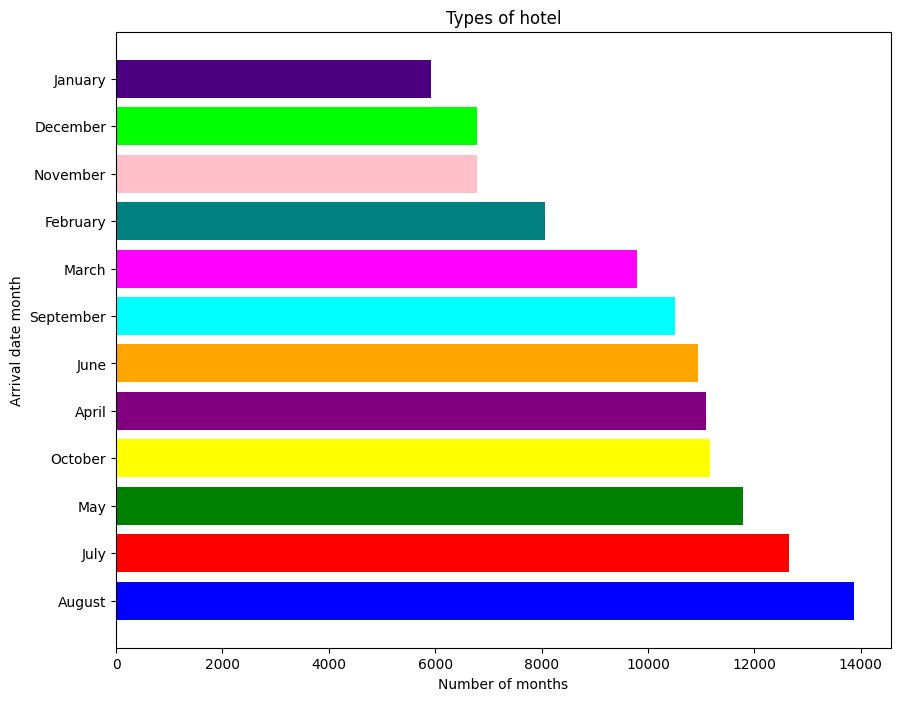

In [41]:
plt.figure(figsize = (10, 8))
plt.title('Types of hotel')
# I use horizontal bars
plt.barh(arrival_month_counts.index, arrival_month_counts.values,
         label = arrival_month_counts.index,
         color = ['Blue','Red','Green','Yellow','Purple','Orange','Cyan','Magenta','Teal','Pink','Lime','Indigo'])
plt.xlabel('Number of months')
plt.ylabel('Arrival date month')
plt.show()